In [52]:
import pandas as pd
import numpy as np

In [53]:
# Dataset original
df = pd.read_csv('data/esets_lung_exprs_genes.txt',sep="\t",header=None,index_col=0)

C:\Users\Alexander\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250

In [54]:
# Código de para dividir arreglar y alistar la data
df2=df.transpose()
df2.columns=df2.columns.fillna('sample_name')
df2['sample_name']=df2['sample_name'].str[:9]
df3=pd.read_csv('data/E-MTAB-6699.sdrf.txt', sep="\t",header=0,index_col=False)
df4=df3.drop(['Extract Name','Factor Value[disease]'],axis=1)
df5=df3.drop(df4,axis=1)
df5['Tumor']=np.where(df5['Factor Value[disease]']=='tumor',1 ,0)
df6=df5.drop(['Factor Value[disease]'],axis=1)
null_columns4=df2.columns[df2.isna().any()]
df2[null_columns4].isna().sum()
df7=df2.merge(df6,how='inner',left_on='sample_name',right_on='Extract Name',left_index=True)
df7.set_index(df7['sample_name'],inplace=True)
df7=df7.drop(['sample_name','Extract Name'],axis=1)
df_caract=df7.drop('Tumor',axis=1)
df_result=df7.drop(df_caract,axis=1)

In [55]:
df_caract.head(10)

,RFC2,HSPA6,PAX8,GUCA1A,THRA,PTPN21,CCL5,CYP2E1,EPHB3,ESRRA,...,NAF1,CCDC63,C16orf52,LOC101929475,LOC389641,LOC400499,GALR3,NUS1P3,TMEM231,LOC100505915
sample_name,,,,,,,,,,,,,,,,,,,,,
GSM258551,7.42758244555227,6.54816125773337,7.51113190990481,5.89798759545012,6.35277132078249,6.3165506567819,9.06605407530796,4.9840916184553,7.72358832790834,7.69131110652345,...,6.12457,4.45625,3.50302,4.17653,5.34322,6.78441,6.16056,4.18889,5.8979,5.93624
GSM258552,7.52013606768351,7.64051736636398,7.11449059793354,5.36228352661111,6.11920219091691,7.60694950208702,9.9221180181805,6.25912584647201,7.20798107903431,7.46683534518673,...,6.08287,4.61637,3.67727,4.40539,4.75759,6.40126,5.5515,4.50505,5.06598,5.66364
GSM258553,8.60710702202386,7.53841574274325,7.63188322595173,6.01510325146066,6.56746941647352,4.96884640647012,9.88687858564922,4.77365849577781,7.95841747036874,7.29318229157693,...,6.78802,5.00605,3.84554,4.4489,4.79452,6.04886,6.36346,4.62658,6.43551,5.15131
GSM258554,7.55095069833604,6.62446731224566,8.09771318026249,5.77776199447971,6.91186138232416,7.23791939561862,8.43337618911167,7.05750126660718,7.6001281227017,7.79220201325052,...,7.3737,4.9387,3.46274,4.28529,5.0895,6.51232,6.30356,4.52943,6.97467,5.01355
GSM258555,8.74849398266653,7.32491892467417,7.66345530229684,5.58221445049765,6.35217681445702,6.95537841900929,7.23790227016079,6.53676635735515,8.95116152465713,8.03119162926749,...,7.01699,4.45247,3.86656,4.22638,4.6499,5.79015,5.82199,4.29849,7.81869,5.34667
GSM258556,8.52492137484236,8.78833806659679,7.29163163451372,5.42058462521047,6.30853301683324,5.26078251711048,8.91690223051652,6.15152266644447,7.47713157955983,7.97366713570062,...,6.99424,4.79846,3.67443,4.23201,5.28968,6.53079,5.87379,4.26554,4.34709,5.64369
GSM258557,7.75767286102677,9.95119825208557,8.00936241743949,5.33082778274708,6.56605800683413,6.75274505509105,10.2178937780395,5.92941599063786,7.37226568273501,7.77132837404169,...,6.47795,4.92159,3.5865,4.22783,4.8105,6.24793,6.00111,5.12,5.97787,5.47553
GSM258558,7.05658915880431,6.77349324177506,7.95618493168926,5.81671683361456,7.7644419280956,6.19319744326283,10.3233528640728,5.51332649525001,7.29674874047304,7.69626023308804,...,7.05454,4.83312,3.93897,4.42932,5.23939,6.46012,5.66495,3.94432,7.05182,5.68092
GSM258559,8.12425062303228,9.15962974417968,7.63811312097626,5.45715010488022,6.38242230891136,7.1362926078468,8.37145457969297,4.82881599329115,7.81474487693379,8.29352373497009,...,6.64252,4.63626,3.37188,4.22625,4.6672,6.18626,6.37568,4.95336,5.49462,4.95782


In [ ]:
num_no_sobrevivientes = titanic_train['Survived'].value_counts()[0]
num_sobrevivientes = titanic_train['Survived'].value_counts()[1]

num_muestras = num_no_sobrevivientes - num_sobrevivientes
sobrevivientes = titanic_train[titanic_train['Survived'] == 1]
muestra_sobrevivientes = sobrevivientes.sample(n=num_muestras, random_state=0)

titanic_train_sample = titanic_train.append(muestra_sobrevivientes)

# Verificamos la distribución de la clase
titanic_train_sample['Survived'].value_counts()

In [67]:
df_result['Tumor'].value_counts()


1    1086
0     147
Name: Tumor, dtype: int64

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_caract)
scaled_data = scaler.transform(df_caract)
df_scaled_data = pd.DataFrame(scaled_data,)
df_scaled_data.head()

C:\Users\Alexander\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Alexander\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  """


,0,1,2,3,4,5,6,7,8,9,...,20535,20536,20537,20538,20539,20540,20541,20542,20543,20544
0,-0.702243,-1.186977,-0.136753,1.454000,-0.819272,-0.451700,0.146391,-0.295728,0.076399,-0.102030,...,-1.250527,-0.885869,-0.462379,-0.462702,1.898461,2.443383,0.660405,-0.535706,-0.566002,1.864991
1,-0.552898,-0.224109,-1.414517,-0.887600,-1.294878,0.811573,0.817081,1.588291,-0.702057,-0.667040,...,-1.341649,-0.229076,0.017792,0.179965,-0.202074,1.023935,-1.538569,0.048263,-1.508938,1.087795
2,1.201051,-0.314108,0.252242,1.965921,-0.382092,-1.771073,0.789473,-0.606668,0.430941,-1.104128,...,0.199439,1.369297,0.481485,0.302118,-0.069629,-0.281615,1.392977,0.272723,0.043338,-0.372896
3,-0.503175,-1.119716,1.752895,0.928486,0.319178,0.450300,-0.349286,2.767988,-0.109999,0.151914,...,1.479431,1.093043,-0.573377,-0.157288,0.988418,1.435365,1.176694,0.093280,0.654452,-0.765658
4,1.429195,-0.502297,0.353951,0.073734,-0.820483,0.173699,-1.285890,1.998539,1.929772,0.753455,...,0.699860,-0.901372,0.539428,-0.322723,-0.588351,-1.240101,-0.561986,-0.333276,1.611092,0.184074


In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
# transformacion de datos a 2 componentes principales
data_two_components = pca.transform(scaled_data)
df_two_componentes = pd.DataFrame(data_two_components , columns = ["pc1" , "pc2"])

# aslgo
print(scaled_data.shape)
print(data_two_components.shape)

(1233, 20545)
(1233, 2)


In [62]:
df_result.dtype

AttributeError: 'DataFrame' object has no attribute 'dtype'

ValueError: 'c' argument must either be valid as mpl color(s) or as numbers to be mapped to colors. Here c =              Tumor
sample_name       
GSM258551        1
GSM258552        1
GSM258553        1
GSM258554        1
GSM258555        1
GSM258556        1
GSM258557        1
GSM258558        1
GSM258559        1
GSM258560        1
GSM258561        1
GSM258562        1
GSM258563        1
GSM258564        1
GSM258565        1
GSM258566        1
GSM258567        1
GSM258568        1
GSM258569        1
GSM258570        1
GSM258571        1
GSM258572        1
GSM258573        1
GSM258574        1
GSM258575        1
GSM258576        1
GSM258577        1
GSM258578        1
GSM258579        1
GSM258580        1
...            ...
GSM748336        1
GSM748337        1
GSM748338        1
GSM748339        1
GSM748341        1
GSM748342        1
GSM748343        1
GSM748344        1
GSM748345        1
GSM748346        1
GSM748347        1
GSM748348        1
GSM748349        1
GSM748350        1
GSM748351        1
GSM748352        1
GSM748353        1
GSM748354        1
GSM748355        1
GSM748356        1
GSM748357        1
GSM748358        1
GSM748359        1
GSM748360        1
GSM748361        1
GSM748362        1
GSM748363        1
GSM748364        1
GSM748365        1
GSM748366        1

[1233 rows x 1 columns].

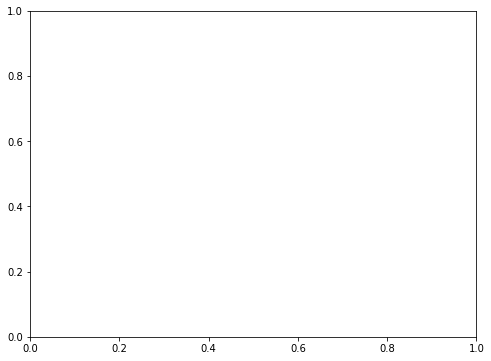

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(data_two_components[:,0] , data_two_components[:,1]  , c=df_result , cmap = "plasma")
plt.xlabel("primera componente principal")
plt.ylabel("segunda componente principal")